In [214]:
#!pip install xgboost

In [215]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [216]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('result.csv',low_memory=False)
result = []
df.head(5)

,Unnamed: 0,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,SOUNDEX,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_DISTRIT,ID_BAIRRO,NM_BAIRRO,ID_LOGRADO,ID_GEO1,ID_GEO2,NM_REFEREN,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,HOSPITAL,DDD_HOSP,TEL_HOSP,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CODISINF,CO_BAINF,NOBAIINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,DS_OBS,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,6,501,2,A90,2016-03-07,201610,2016,29,291560,1388.0,2414155.0,2016-03-05,201609,NaN,4055.0,F,5.0,4.0,1.0,29.0,291560,1388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2016-03-07,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2016-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,336,507898,2,A90,2016-01-19,201603,2016,29,292740,1380.0,3808.0,2015-01-15,201502,NaN,4029.0,F,2.0,9.0,9.0,29.0,292740,1380.0,50.0,150.0,PIATA,NaN,NaN,NaN,NaN,1.0,1.0,2016-01-19,111220.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,9.0,NaN,1.0,NaN,2016-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PACIENTE GESTANTE 19 SEMANAS, APRESENTA CEFALÉ...",2.0,NaN,2016-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
2,444,122892,2,A90,2016-01-13,201602,2016,29,293330,1398.0,2402076.0,2016-01-05,201601,NaN,4023.0,I,6.0,NaN,9.0,29.0,293330,1398.0,NaN,297.0,LAGOA FORMOSA,NaN,NaN,NaN,NaN,2.0,1.0,2016-01-13,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.0,1.0,293330.0,NaN,NaN,NaN,10.0,2.0,NaN,NaN,9.0,NaN,2016-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PACIENTE APRESENTOU PURIDO,FEBRE,MIALGIA",2.0,NaN,2016-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
3,622,100258,2,A90,2016-01-06,201601,2016,29,291360,1385.0,2415844.0,2016-01-05,201601,NaN,4040.0,M,6.0,9.0,NaN,29.0,291360,1385.0,NaN,10.0,ESPERANCA,NaN,NaN,NaN,VENDA DE VAL,1.0,1.0,2016-01-06,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [217]:
campos = [
    'CRITERIO','CS_FLXRET','FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA',
    'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
    'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE','CLASSI_FIN'
]
df = df[campos]

non_floats = []
df = df[df['CLASSI_FIN'].isin([5, 8, 10, 11, 12])]
'''
df = df.loc[:, df.isnull().mean() < .8]
df.dropna(inplace=True)
for col in df:
    if df[col].dtypes != "float64":
        non_floats.append(col)
df = df.drop(columns=non_floats)
'''

df.loc[df['CLASSI_FIN'] < 10,'CLASSI_FIN'] = 0
df.loc[df['CLASSI_FIN'] != 0,'CLASSI_FIN'] = 1

for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(0,inplace=True)

C:\Users\ryane\AppData\Local\Temp\ipykernel_14380\3085789905.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(0,inplace=True)


In [218]:
df.dropna(inplace=True)
df.isna().any()


CRITERIO      False
CS_FLXRET     False
FEBRE         False
MIALGIA       False
CEFALEIA      False
EXANTEMA      False
VOMITO        False
NAUSEA        False
DOR_COSTAS    False
CONJUNTVIT    False
ARTRITE       False
ARTRALGIA     False
PETEQUIA_N    False
LEUCOPENIA    False
LACO          False
DOR_RETRO     False
DIABETES      False
HEMATOLOG     False
HEPATOPAT     False
RENAL         False
HIPERTENSA    False
ACIDO_PEPT    False
AUTO_IMUNE    False
CLASSI_FIN    False
dtype: bool

In [219]:
df.describe()

,CRITERIO,CS_FLXRET,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,CLASSI_FIN
count,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000,198433.000000
mean,1.210373,0.379312,1.132659,1.258289,1.237123,1.804720,1.775849,1.697843,1.735629,1.962506,1.898580,1.727137,1.907475,1.974183,1.983551,1.733038,1.975281,1.993706,1.993499,1.995510,1.933640,1.992693,1.995570,0.395695
std,1.030774,0.485217,0.339207,0.437695,0.425319,0.396417,0.417023,0.459194,0.440999,0.189969,0.301884,0.445432,0.289766,0.158590,0.127194,0.442373,0.155267,0.079087,0.080366,0.066858,0.248911,0.085170,0.066409,0.489001
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [220]:
#from imblearn.under_sampling import RandomUnderSampler
X = df.drop(columns=['CLASSI_FIN'])
y = df['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, stratify=y_train, test_size=0.25, random_state=42)

In [221]:
xgb = XGBClassifier(objective='binary:logistic', enable_categorical=True ,seed=42)
xgb.fit(X_train,
        y_train,
        verbose=True,
        eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.54202
[1]	validation_0-logloss:0.47150
[2]	validation_0-logloss:0.42733
[3]	validation_0-logloss:0.39826
[4]	validation_0-logloss:0.37870
[5]	validation_0-logloss:0.36501
[6]	validation_0-logloss:0.35545
[7]	validation_0-logloss:0.34865
[8]	validation_0-logloss:0.34363
[9]	validation_0-logloss:0.33995
[10]	validation_0-logloss:0.33741
[11]	validation_0-logloss:0.33545
[12]	validation_0-logloss:0.33392
[13]	validation_0-logloss:0.33291
[14]	validation_0-logloss:0.33199
[15]	validation_0-logloss:0.33130
[16]	validation_0-logloss:0.33088
[17]	validation_0-logloss:0.33057
[18]	validation_0-logloss:0.33026
[19]	validation_0-logloss:0.33009
[20]	validation_0-logloss:0.32985
[21]	validation_0-logloss:0.32980
[22]	validation_0-logloss:0.32960
[23]	validation_0-logloss:0.32952
[24]	validation_0-logloss:0.32936
[25]	validation_0-logloss:0.32932
[26]	validation_0-logloss:0.32926
[27]	validation_0-logloss:0.32925
[28]	validation_0-logloss:0.32927
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [222]:
y_pred = xgb.predict(X_test)

result.append(['XGBoost', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

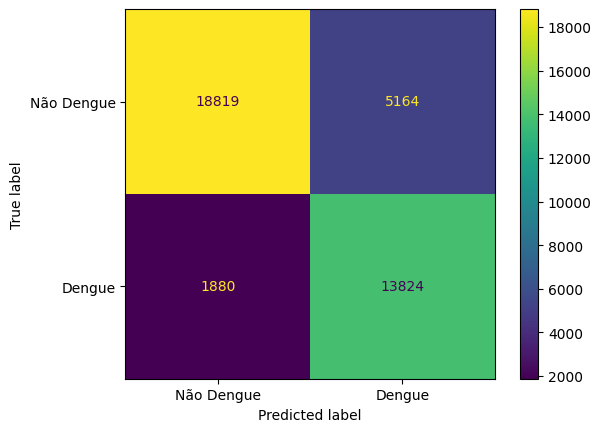

In [223]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Não Dengue', 'Dengue'])
disp.plot()
plt.show()

In [224]:
precision_score(y_test, y_pred)

0.7280387613229408

In [225]:
recall_score(y_test, y_pred)

0.8802852776362711

In [226]:
f1_score(y_test, y_pred)

0.7969560705638188

In [227]:
model_path = 'xgb.txt'
with open(model_path, 'wb') as file:
    pickle.dump(xgb, file)

X_test_path = 'X_test.txt'
with open(X_test_path, 'wb') as file:
    pickle.dump(X_test, file)

y_test_path = 'y_test.txt'
with open(y_test_path, 'wb') as file:
    pickle.dump(y_test, file)

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
result.append(['K-Nearest Neighbors', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

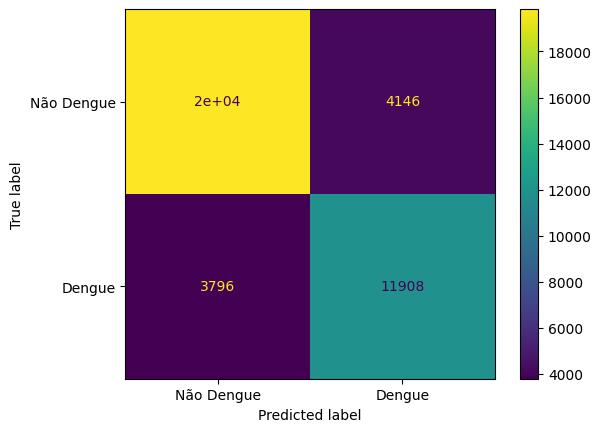

In [229]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Não Dengue', 'Dengue'])
disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [230]:
precision_score(y_test, y_pred)

0.741746605207425

In [231]:
recall_score(y_test, y_pred)

0.7582781456953642

In [232]:
f1_score(y_test, y_pred)

0.7499212796775616

In [233]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

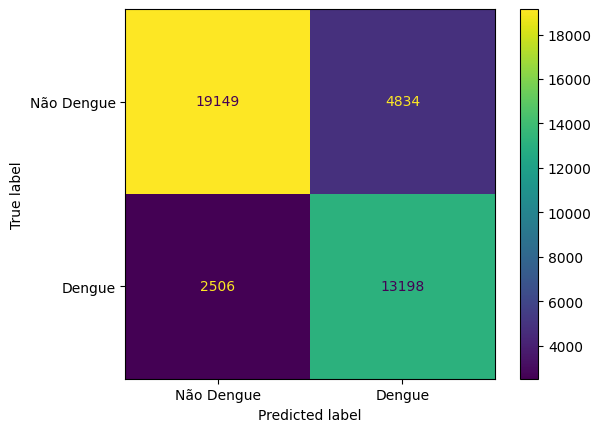

In [234]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Não Dengue', 'Dengue'])
disp.plot()
plt.show()

In [235]:
precision_score(y_test, y_pred)

0.7319210292812778

In [236]:
recall_score(y_test, y_pred)

0.8404228222109017

In [237]:
f1_score(y_test, y_pred)

0.7824282665401945

In [238]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',penalty='l2',max_iter=100)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
result.append(['Logistic Regression', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

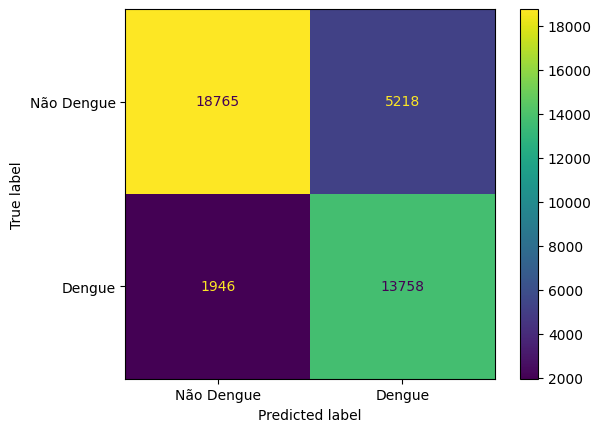

In [239]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Não Dengue', 'Dengue'])
disp.plot()
plt.show()

In [240]:
precision_score(y_test,y_pred)

0.7250210792580101

In [241]:
precision_score(y_test,y_pred)

0.7250210792580101

In [242]:
precision_score(y_test,y_pred)

0.7250210792580101

In [243]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
result.append(['Random Forest', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

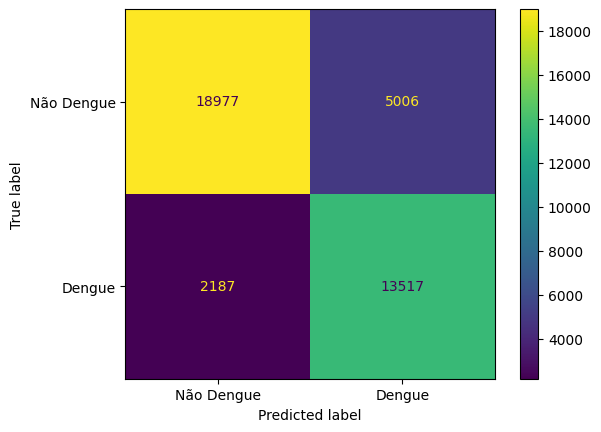

In [244]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Não Dengue', 'Dengue'])
disp.plot()
plt.show()

In [245]:
precision_score(y_test,y_pred)

0.7297414025805755

In [246]:
recall_score(y_test,y_pred)

0.8607361181864494

In [247]:
f1_score(y_test,y_pred)

0.7898442749875829

In [248]:
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid')]
    )

optimizer = Adam(0.001)
nn.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

nn.fit(X_train, y_train, epochs=200, validation_data=(X_val,y_val), batch_size=32)

y_pred = nn.predict(X_test)
y_classes = ((y_pred > 0.5)+0).ravel()

result.append(['Neural Network', precision_score(y_test, y_classes).round(2), recall_score(y_test, y_classes).round(2), f1_score(y_test, y_classes).round(2)])


Epoch 1/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8024 - loss: 0.3744 - val_accuracy: 0.8218 - val_loss: 0.3390
Epoch 2/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8174 - loss: 0.3413 - val_accuracy: 0.8230 - val_loss: 0.3341
Epoch 3/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8175 - loss: 0.3405 - val_accuracy: 0.8224 - val_loss: 0.3335
Epoch 4/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8173 - loss: 0.3403 - val_accuracy: 0.8237 - val_loss: 0.3325
Epoch 5/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8178 - loss: 0.3378 - val_accuracy: 0.8243 - val_loss: 0.3317
Epoch 6/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8199 - loss: 0.3372 - val_accuracy: 0.8201 - val_loss: 0.3364
Epoch 7/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8206 - loss: 0.3364 - val_accuracy: 0.8251 - val_loss: 0.3313
Epoch 8/200
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8197 - loss: 0

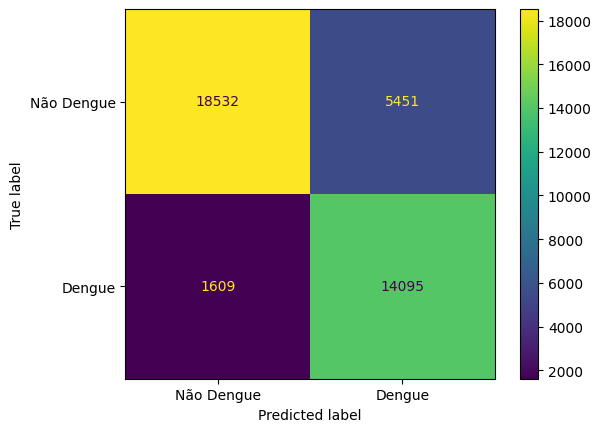

In [249]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Não Dengue', 'Dengue'])
disp.plot()
plt.show()

In [250]:
precision_score(y_test,y_classes)

0.721119410621099

In [251]:
recall_score(y_test,y_classes)

0.8975420275089149

In [252]:
f1_score(y_test,y_classes)

0.7997163120567375

In [253]:
classificators = pd.DataFrame(result, columns=['Classificator', 'Precision', 'Recall', 'F1'])
classificators.to_csv('classificators.csv',index=False)

In [254]:
classificators

,Classificator,Precision,Recall,F1
0,XGBoost,0.73,0.88,0.80
1,K-Nearest Neighbors,0.74,0.76,0.75
2,Logistic Regression,0.73,0.88,0.79
3,Random Forest,0.73,0.86,0.79
4,Neural Network,0.72,0.90,0.80
